Living in the SF Bay Area offers very interesting experiences. My commute is one of them. I could use the traditional services, BART or AC Transit, to commute to San Francisco, however, neither are as enticing as [SF Casual Carpool](http://sfcasualcarpool.com/).

Commuting to San Francisco can be tough, especially during rush hour. The Bay Bridge is the only way to get to San Francisco from the East Bay and traffic is normally pretty heavy. However, using the carpool lane can significantly reduce a driver's commute. Also, the bridge toll during rush hour is \$6 while the carpool lane toll is \$2.50. The only caveat here is that the carpool lane requires at least 3 people in a vehicle.

This is where SF Casual Carpool comes into play! Drivers pick-up enough passengers, at designated pick-up locations, to fulfill the carpool requirement. Drivers also have the option to ask passengers to contribute $1 for the ride. In my experience, drivers rarely ask so passengers offer the dollar. Drivers rarely accept it though. At first glance, people are very skeptical of this service, but we've been using it for a little over a year and it's been great!

My wife and I use this service as passengers. Often times, we find ourselves waiting in line for an undetermined amount of time. Faced with the need to understand our wait times, I started tracking a few data points related to my daily experience, and convinced my wife to do so as well. In a Google Sheet, we log the date, weekday, number of people in line, line-up time, pick-up time, and any notes we find relevant. The other twist here is that the designated pick-up location is right next to an AC Transit bus stop which also gets us to work. In the case that the line is too long, we opt for the bus.

The goal of this analysis is to understand the wait times. When is the line the longest? When is it better to walk straight to the bus stop? Through experience, we've noticed that the weather and school schedule also have an impact on the line count and wait times. I'd also like to understand this a little better. Lastly, I'd like to create a forecast of the wait time on a particular day and time.

In this notebook, I import the data and clean it up a little. In future notebooks, I'll perform exploratory analysis and forecasts.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [15, 6]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the data
Load the Google Sheet data and read the first 5 rows just to get a feel for what the raw data looks like.

In [2]:
data = pd.read_csv('data/raw.csv', encoding='utf-8')
data.head()

,Date,Day of Week,# in Line,Line-up Time,Pick-up Time,Notes
0,6/8/2016,Wednesday,19,7:50:00 AM,8:05:00 AM,NaN
1,6/9/2016,Thursday,4,7:26:00 AM,7:29:00 AM,NaN
2,6/9/2016,Thursday,19,8:01:00 AM,8:21:00 AM,Bus arrived as I got in line
3,6/10/2016,Friday,9,7:30:00 AM,7:38:00 AM,NaN
4,6/10/2016,Friday,21,7:50:00 AM,8:00:00 AM,Took the bus after 10 minutes


# Create timestamps
The Date and Line-up Time and Pick-up Time columns can be combined into timestamp columns which are more useable.

In [3]:
data['timestamp_arrive'] = pd.to_datetime(data['Date']+' '+data['Line-up Time'])
data['timestamp_depart'] = pd.to_datetime(data['Date']+' '+data['Pick-up Time'])

# Clean-up columns
Rename three columns so they are easier to reference in the future. Next, drop columns that were used to create timestamps as they are no longer required.

In [4]:
data = data.rename(columns={'Day of Week':'weekday',
                            '# in Line':'line_count',
                            'Notes':'notes'})

In [5]:
data = data.drop(['Date', 'Line-up Time', 'Pick-up Time'], axis=1)

In [6]:
data.head()

,weekday,line_count,notes,timestamp_arrive,timestamp_depart
0,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 08:05:00
1,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:29:00
2,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:21:00
3,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:38:00
4,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 08:00:00


# Describe numeric columns
Calculate descriptive statistics of the one numeric column.

In [7]:
data.describe()

,line_count
count,269.00
mean,9.35
std,7.54
min,0.00
25%,3.00
50%,8.00
75%,14.00
max,31.00


# Histogram of line count
Plot a histogram of the line count just to get an initial feel of it. One thing to keep in mind though is that the line count may be a function of the time of day. We'll explore this further in a different notebook.

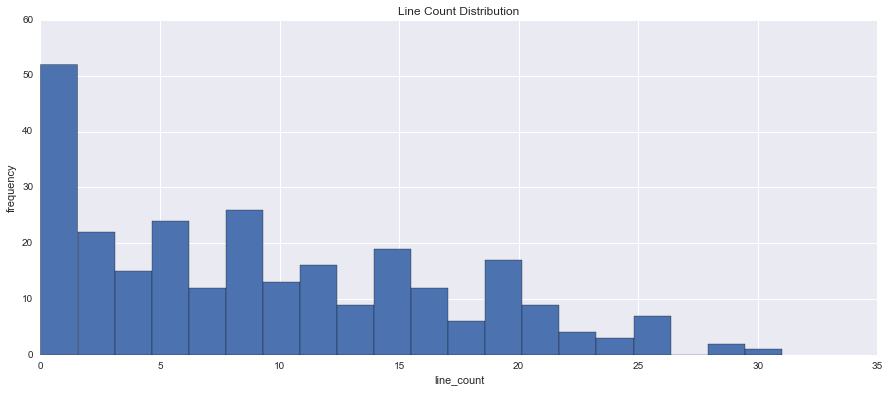

In [8]:
data['line_count'].hist(bins=20)
plt.title('Line Count Distribution')
plt.xlabel('line_count')
plt.ylabel('frequency')

# Save prepared data
Save the prepared data for exploratory analysis and forecast creation.

In [9]:
data.to_csv('data/data.csv')